In [3]:
import xarray as xr
import matplotlib.pyplot as plt

In [5]:
ds = xr.load_dataset('D:\\thesis\\CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly.nc')

In [6]:
lat_bounds = slice(44.75, 46.5)
lon_bounds = slice(8.5, 11)

agl = ds.agl.sel(lat=lat_bounds, lon=lon_bounds)

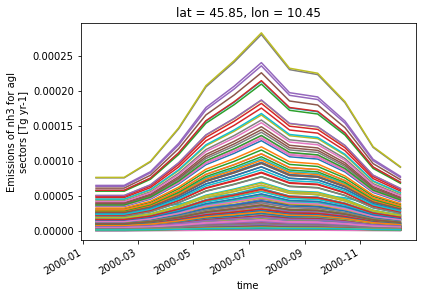

In [7]:
plt.figure()
for i in range(12):
    for j in range(20):
        agl[:, i, j][0:12].plot()

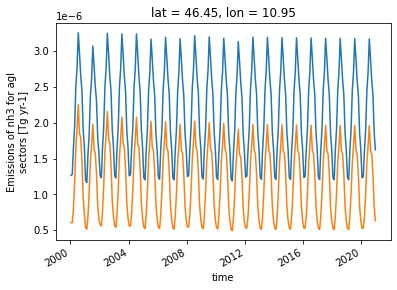

In [8]:
plt.figure()
agl[:, 0, 0].plot()
agl[:, -1, -1].plot()

In [69]:
import geopandas as gpd
from shapely.geometry import Point

df = gpd.read_file('..\\resources\\Regione_10000_CT10_polygon\\Regione_10000_CT10_polygon.shp')

df.to_crs(epsg=4326, inplace=True)
df.plot()

lats = agl.lat
lons = agl.lon

grid = [(x,y) for x in lats.to_series() for y in lons.to_series()]

lats = [x[0] for x in grid]
lons = [x[1] for x in grid]

plt.scatter(lons, lats, c='r')

In [70]:
grid = [ (lat, lon) for lat, lon in zip(lats, lons) if df.geometry.contains(Point(lon, lat)).bool()]

In [71]:
lats = [x[0] for x in grid]
lons = [x[1] for x in grid]

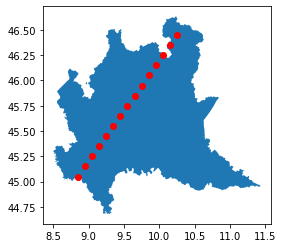

In [72]:
df.plot()
plt.scatter(lons, lats, c='r')

plt.show()